<small><small><i>
Introduction to Python for Bioinformatics - available at https://github.com/kipkurui/Python4Bioinformatics.
</i></small></small>

## Data Analysis with Pandas

For this topic, we are going to use resources available from Data carpentry's [Python for Ecologists](http://www.datacarpentry.org/python-ecology-lesson/). 


### Set up

Ensure you have installed `pandas` and `matplotlib` before the session. 

`conda install pandas`

Follow the instructions provided [here](http://www.datacarpentry.org/python-ecology-lesson/setup) for further details on setting up, and to download the data. 

### Some useful resources

1. [10 Minutes Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) provides a quick introduction to pandas Data Types and syntax
2. Dataquest's [Pandas Tutorial: Data analysis with Python: Part 1](https://www.dataquest.io/blog/pandas-python-tutorial/)
3. Coding Club's [Python Data Analysis with Pandas and Matplotlib](https://ourcodingclub.github.io/2018/04/18/pandas-python-intro.html)

### Training format

In this lesson, we will use live coding to follow along with Python for Ecologist's resources. 

In [1]:
import pandas as pd

In [2]:
import os

In [3]:

os.chdir('../portal-teachingdb-master/')

In [4]:
pwd

'/home/icipe/Desktop/Python4Bioinformatics/portal-teachingdb-master'

In [7]:
pd.read_csv('surveys.csv')

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [8]:
survey_df = pd.read_csv('surveys.csv')

In [9]:
survey_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [10]:
type(survey_df)

pandas.core.frame.DataFrame

In [11]:
survey_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [12]:
survey_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [13]:
survey_df.shape

(35549, 9)

In [14]:
survey_df.tail(
)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [15]:
species = pd.unique(survey_df['species_id'] )

In [16]:
len(species)

49

In [17]:
collection_sites = pd.unique(survey_df['plot_id'])

In [18]:
len(collection_sites)


24

In [19]:
survey_df['plot_id'].nunique()

24

In [20]:
survey_df['weight'].max()

280.0

In [21]:
grouped_data = survey_df.groupby('sex')

In [23]:
grouped_data.describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.587253  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.396184  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

In [24]:
species_count = survey_df.groupby('species_id')['record_id'].count()

In [25]:
survey_df.groupby('sex')['record_id'].count()['M']

17348

In [26]:
survey_df.groupby('sex')['record_id'].count()['F']


15690

In [27]:
print(species_count)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


In [28]:
%matplotlib inline

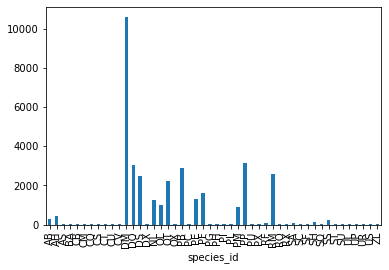

In [29]:
species_count.plot(kind='bar')

In [30]:
total_count = survey_df.groupby('plot_id')['record_id'].nunique()

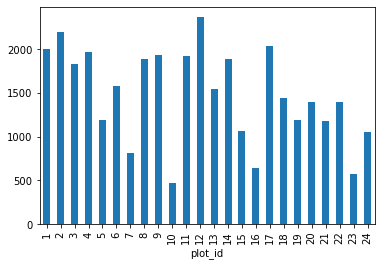

In [31]:
total_count.plot(kind = 'bar')

In [32]:
average_weight = survey_df.groupby('species_id')['weight'].mean()

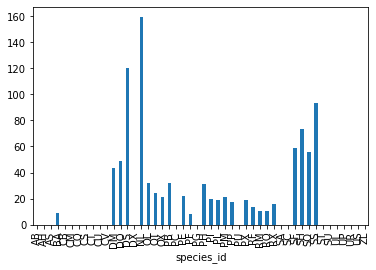

In [33]:
average_weight.plot(kind = 'bar')

In [35]:
average_weight.describe()

count     25.000000
mean      39.028431
std       37.459541
min        7.923127
25%       17.173942
50%       21.586508
75%       48.870523
max      159.245660
Name: weight, dtype: float64

In [34]:
total_gender = survey_df.groupby('sex')['record_id'].count()

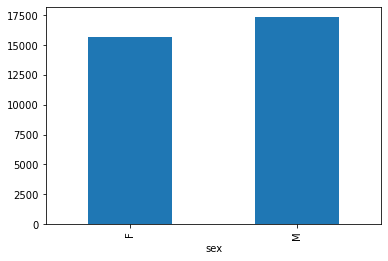

In [35]:
total_gender.plot(kind = 'bar', stacked = True)

Text(0.5, 0, 'Plot_id')

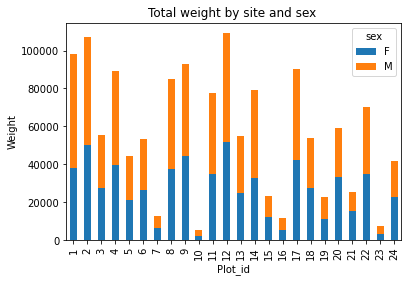

In [36]:
survey_df = pd.read_csv('surveys.csv')
stacked = survey_df.groupby(['plot_id', 'sex'])
stacked_weight = stacked['weight'].sum()
unstacked_weight = stacked_weight.unstack()
weight_plot = unstacked_weight.plot(kind = 'bar', stacked = True, title = 'Total weight by site and sex ')
weight_plot.set_ylabel('Weight')
weight_plot.set_xlabel('Plot_id')

In [37]:
import pandas as pd

In [38]:
import os

In [39]:
pwd

'/home/icipe/Desktop/Python4Bioinformatics/portal-teachingdb-master'

In [40]:
survey_df['species_id']


0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

In [41]:
plot = survey_df[['sex', 'plot_id']]

In [42]:
plot.head(10)

,sex,plot_id
0,M,2
1,M,3
2,F,2
3,M,7
4,M,3
5,M,1
6,F,2
7,M,1
8,F,1
9,F,6


In [43]:
survey_df['record_id'][0:2]

0    1
1    2
Name: record_id, dtype: int64

In [44]:
a = [1, 2, 3, 4, 5]

In [45]:
len(survey_df)



35549

In [46]:
true_copy_surveys_df = survey_df.copy()


In [47]:
survey_df = pd.read_csv('surveys.csv')

In [48]:
survey_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


In [49]:
survey_df.loc[[0, 10], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


In [50]:
survey_df.loc[0, ['species_id', 'plot_id', 'weight']] 

species_id     NL
plot_id         2
weight        NaN
Name: 0, dtype: object

In [51]:
survey_df.loc[[0, 10, 3549], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN
3549,3550,12,15,1980,2,DM,F,37.0,46.0


In [52]:
survey_df.iloc[0, 6]


'M'

In [53]:
survey_df.iloc[0,1]

7

In [54]:
survey_df.iloc[0:4, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977
3,7,16,1977


In [55]:

survey_df[(survey_df.year >= 1999) & (survey_df.weight <= 8)]


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
29082,29083,1,16,1999,21,RM,M,16.0,8.0
29196,29197,2,20,1999,18,RM,M,18.0,8.0
29421,29422,3,15,1999,16,RM,M,15.0,8.0
29903,29904,10,10,1999,4,PP,M,20.0,7.0
29905,29906,10,10,1999,4,PP,M,21.0,4.0
30867,30868,6,4,2000,8,PP,F,21.0,8.0
30901,30902,7,1,2000,1,PP,M,20.0,8.0
31456,31457,10,1,2000,6,RM,M,8.0,8.0
31611,31612,11,26,2000,16,RM,M,17.0,8.0
31802,31803,3,3,2001,17,RM,M,16.0,8.0


In [56]:
survey_df[survey_df['species_id'].isin(['DO'])]



,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
67,68,8,19,1977,8,DO,F,32.0,52.0
291,292,10,17,1977,3,DO,F,36.0,33.0
293,294,10,17,1977,3,DO,F,37.0,50.0
316,317,10,17,1977,17,DO,F,32.0,48.0
322,323,10,17,1977,17,DO,F,33.0,31.0
...,...,...,...,...,...,...,...,...,...
35502,35503,12,31,2002,6,DO,M,33.0,32.0
35515,35516,12,31,2002,11,DO,F,35.0,52.0
35517,35518,12,31,2002,11,DO,M,36.0,38.0
35526,35527,12,31,2002,13,DO,F,33.0,43.0


In [57]:
survey_df[survey_df.weight == 8]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
68,69,8,19,1977,2,PF,M,15.0,8.0
80,81,8,19,1977,4,PF,F,14.0,8.0
112,113,8,20,1977,5,PF,F,13.0,8.0
171,172,9,11,1977,22,PF,F,NaN,8.0
331,332,10,18,1977,12,PF,M,16.0,8.0
...,...,...,...,...,...,...,...,...,...
33653,33654,3,14,2002,4,PF,M,17.0,8.0
33656,33657,3,14,2002,4,PF,F,16.0,8.0
33868,33869,4,17,2002,4,PF,F,15.0,8.0
34312,34313,6,16,2002,6,PP,M,21.0,8.0


In [58]:
survey_df[survey_df['sex'].isin(['M'])]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
...,...,...,...,...,...,...,...,...,...
35524,35525,12,31,2002,9,OL,M,21.0,26.0
35533,35534,12,31,2002,14,DM,M,37.0,56.0
35534,35535,12,31,2002,14,DM,M,37.0,53.0
35538,35539,12,31,2002,15,SF,M,26.0,68.0


In [59]:
pd.notnull(survey_df)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
35544,True,True,True,True,True,True,False,False,False
35545,True,True,True,True,True,True,False,False,False
35546,True,True,True,True,True,True,True,True,True
35547,True,True,True,True,True,True,True,True,True


In [60]:
survey_df[pd.isnull(survey_df).any(axis=1)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35530,35531,12,31,2002,13,PB,F,27.0,NaN
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN


In [61]:
survey_df['record_id'] = survey_df['record_id'].astype('float64')

In [62]:
survey_df['record_id'].dtype

dtype('float64')

In [63]:
round(survey_df['weight'].mean(), 2)


42.67

In [64]:
len(survey_df[pd.isnull(survey_df['weight'])])

3266

In [65]:
len(survey_df[survey_df['weight'] > 0])

32283

In [66]:
df1 = survey_df

In [67]:
df1['weight'] = df1['weight'].fillna(0)

In [68]:
round(df1['weight'].mean(), 2)

38.75

In [69]:
df1['weight'] = survey_df['weight'].fillna(survey_df['weight'].mean())

In [70]:
df1.isnull()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
35544,False,False,False,False,False,False,True,True,False
35545,False,False,False,False,False,False,True,True,False
35546,False,False,False,False,False,False,False,False,False
35547,False,False,False,False,False,False,False,False,False


In [71]:
survey_df = pd.read_csv('./surveys.csv')

In [72]:
df_na = survey_df.dropna()

In [73]:
df_na 


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [74]:
df_na.to_csv('./surveys_complete.csv', index = False)

In [75]:
import pandas as pd

In [76]:
surveys_df = pd.read_csv("./surveys.csv", keep_default_na=False, na_values=[""])

In [77]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [78]:
species_df = pd.read_csv("./species.csv",
                         keep_default_na=False, na_values=[""])

In [75]:
species_df

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird
5,CM,Calamospiza,melanocorys,Bird
6,CQ,Callipepla,squamata,Bird
7,CS,Crotalus,scutalatus,Reptile
8,CT,Cnemidophorus,tigris,Reptile
9,CU,Cnemidophorus,uniparens,Reptile


In [79]:
survey_sub = survey_df.head(10)

In [80]:
survey_sub_last10 = surveys_df.tail(10)

In [81]:
survey_sub_last10 = survey_sub_last10.reset_index(drop=True)

In [82]:
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis = 0)
horrisontal_stack = pd.concat([survey_sub, survey_sub_last10], axis =1)

In [83]:
horrisontal_stack.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN,35540,12,31,2002,15,PB,F,26.0,23.0
1,2,7,16,1977,3,NL,M,33.0,NaN,35541,12,31,2002,15,PB,F,24.0,31.0
2,3,7,16,1977,2,DM,F,37.0,NaN,35542,12,31,2002,15,PB,F,26.0,29.0
3,4,7,16,1977,7,DM,M,36.0,NaN,35543,12,31,2002,15,PB,F,27.0,34.0
4,5,7,16,1977,3,DM,M,35.0,NaN,35544,12,31,2002,15,US,NaN,NaN,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN,35545,12,31,2002,15,AH,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,35546,12,31,2002,15,AH,NaN,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN,35547,12,31,2002,10,RM,F,15.0,14.0
8,9,7,16,1977,1,DM,F,34.0,NaN,35548,12,31,2002,7,DO,M,36.0,51.0
9,10,7,16,1977,6,PF,F,20.0,NaN,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [84]:
vertical_stack.reset_index(drop = True)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [85]:
horrisontal_stack.reset_index(drop = True)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN,35540,12,31,2002,15,PB,F,26.0,23.0
1,2,7,16,1977,3,NL,M,33.0,NaN,35541,12,31,2002,15,PB,F,24.0,31.0
2,3,7,16,1977,2,DM,F,37.0,NaN,35542,12,31,2002,15,PB,F,26.0,29.0
3,4,7,16,1977,7,DM,M,36.0,NaN,35543,12,31,2002,15,PB,F,27.0,34.0
4,5,7,16,1977,3,DM,M,35.0,NaN,35544,12,31,2002,15,US,NaN,NaN,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN,35545,12,31,2002,15,AH,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,35546,12,31,2002,15,AH,NaN,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN,35547,12,31,2002,10,RM,F,15.0,14.0
8,9,7,16,1977,1,DM,F,34.0,NaN,35548,12,31,2002,7,DO,M,36.0,51.0
9,10,7,16,1977,6,PF,F,20.0,NaN,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [86]:
vertical_stack.to_csv('./vertical_stack.csv', index = False)

In [87]:
horrisontal_stack.to_csv('./horrisontal_stack.csv', index = False)

In [88]:
new_output = pd.read_csv('./vertical_stack.csv', keep_default_na= False, na_values= [" "])

In [26]:
new_output

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,
1,2,7,16,1977,3,NL,M,33.0,
2,3,7,16,1977,2,DM,F,37.0,
3,4,7,16,1977,7,DM,M,36.0,
4,5,7,16,1977,3,DM,M,35.0,
5,6,7,16,1977,1,PF,M,14.0,
6,7,7,16,1977,2,PE,F,,
7,8,7,16,1977,1,DM,M,37.0,
8,9,7,16,1977,1,DM,F,34.0,
9,10,7,16,1977,6,PF,F,20.0,


In [89]:
survey_sub = survey_df.head(10)

In [90]:
species_sub = pd.read_csv('./speciesSubset.csv', keep_default_na= False, na_values=[" "])

In [91]:
survey_sub.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [92]:
species_sub.columns

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [97]:
merged_inner = pd.merge(left = survey_sub, right = species_sub, left_on = 'species_id', right_on = 'species_id')

In [94]:
merged_inner.shape

(8, 12)

In [95]:
merged_inner.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
7,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent


In [98]:
merged_left = pd.merge(left = survey_sub, right = species_sub, how = 'left', left_on = 'species_id', right_on = 'species_id')

In [99]:
merged_left.shape

(10, 12)

In [100]:
merged_left.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


In [101]:
merged_left[pd.isnull(merged_left.genus)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


In [102]:
survey_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [103]:
species_df.columns

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [104]:
species_inner_join = pd.merge(left = survey_df, right = species_df, left_on = 'species_id', right_on = 'species_id')

In [126]:
species_inner_join

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,22,7,17,1977,15,NL,F,31.0,NaN,Neotoma,albigula,Rodent
3,38,7,17,1977,17,NL,M,33.0,NaN,Neotoma,albigula,Rodent
4,72,8,19,1977,2,NL,M,31.0,NaN,Neotoma,albigula,Rodent
...,...,...,...,...,...,...,...,...,...,...,...,...
34781,28988,12,23,1998,6,CT,NaN,NaN,NaN,Cnemidophorus,tigris,Reptile
34782,35512,12,31,2002,11,US,NaN,NaN,NaN,Sparrow,sp.,Bird
34783,35513,12,31,2002,11,US,NaN,NaN,NaN,Sparrow,sp.,Bird
34784,35528,12,31,2002,13,US,NaN,NaN,NaN,Sparrow,sp.,Bird


Text(0.5, 1.0, 'Taxa description')

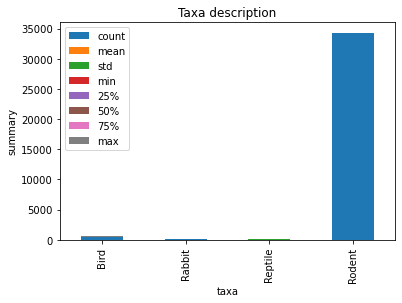

In [167]:
taxa_by_plot = species_inner_join.groupby('taxa')['plot_id'].describe().plot(kind = 'bar', stacked = True)
taxa_by_plot.set_ylabel('summary')
taxa_by_plot.set_title('Taxa description')


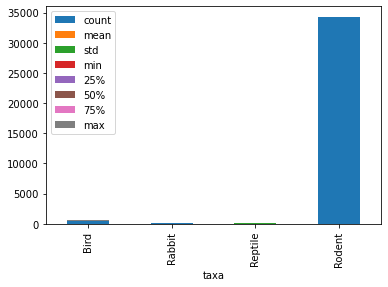

In [107]:
taxa_by_plot.

In [140]:
taxa = species_inner_join.groupby(['plot_id','sex'])

In [147]:
#taxa.describe()

In [149]:
taxa_unstacked = taxa['taxa'].count().unstack()

Text(0.5, 1.0, 'taxa vs plot_id vs sex')

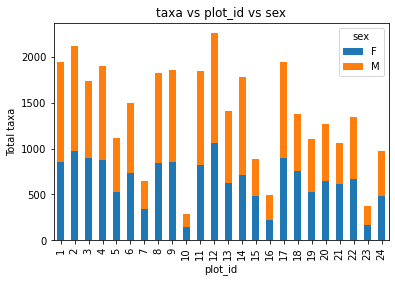

In [155]:
taxa_plot = taxa_unstacked.plot(kind = 'bar', stacked = True)
taxa_plot.set_ylabel('Total taxa')
taxa_plot.set_title('taxa vs plot_id vs sex')

In [117]:
taxa_by_plot.head(10
                 )

,count,mean,std,min,25%,50%,75%,max
taxa,,,,,,,,
Bird,450.0,13.886667,6.712887,1.0,8.25,13.0,20.00,24.0
Rabbit,75.0,13.693333,6.428344,1.0,10.00,14.0,19.00,24.0
Reptile,14.0,13.714286,6.390240,2.0,8.75,14.0,19.75,22.0
Rodent,34247.0,11.303559,6.788889,1.0,5.00,11.0,17.00,24.0
